In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('Iris.csv')
df= df.iloc[:,1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Species'] = lbl.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

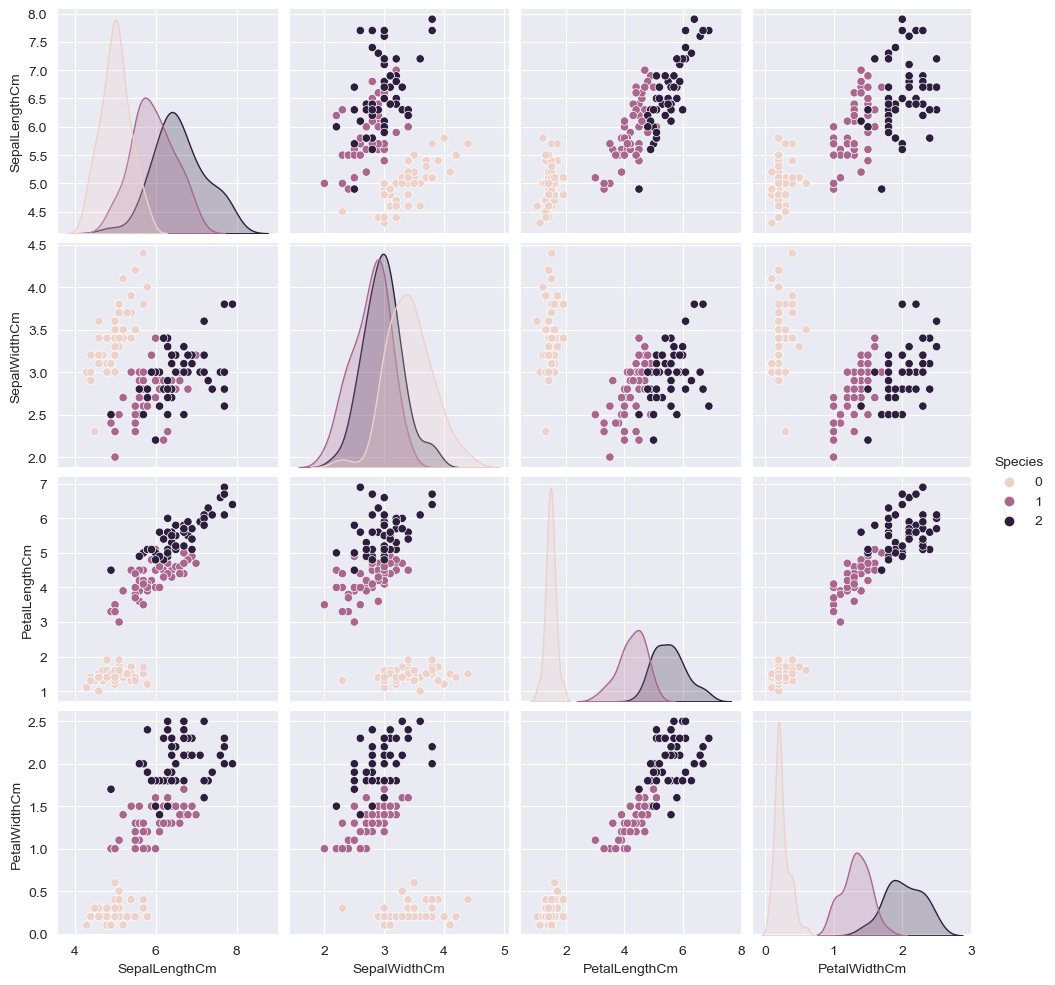

In [31]:
sns.pairplot(df,hue='Species')

In [32]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [33]:
# remove 0 type for calculation
df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [34]:
df['Species'].value_counts()

Species
1    50
2    50
Name: count, dtype: int64

In [35]:
df

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import cross_val_score

# a. Classification with different algo

In [39]:
estimators = [
    ('lr',LogisticRegression()),
    ('knn',KNeighborsClassifier()),
    ('rf',RandomForestClassifier())
]

# Check every estimator validation

In [40]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
knn 0.62
rf 0.59


# 1. Hard Voting

In [41]:
from sklearn.ensemble import VotingClassifier
hard_vc = VotingClassifier(estimators=estimators,voting='hard')
np.mean(cross_val_score(hard_vc,X,y,cv=10,scoring='accuracy'))

0.6699999999999999

# 2. Soft voting

In [42]:
soft_vc = VotingClassifier(estimators=estimators,voting='soft')
np.mean(cross_val_score(soft_vc,X,y,cv=10,scoring='accuracy'))

0.65

# 3. Wighted Voting

In [43]:
def weightedVoting(max_weight):
    maxAcc = 0
    im = 0
    jm = 0
    km = 0
    for i in range(1,max_weight+1):
        for j in range(1,max_weight+1):
            for k in range(1,max_weight+1):
                weighted_vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
                x = np.mean(cross_val_score(weighted_vc,X,y,cv=10,scoring='accuracy'))
                if x > maxAcc:
                    maxAcc = x
                    im = i
                    jm = j
                    km = k                
                print(f"for i={i}, j={j}, k={k} acc={np.round(x,2)}")
                
    return maxAcc, im, jm, km           

In [44]:
acc, i ,j ,k = weightedVoting(4)

for i=1, j=1, k=1 acc=0.65
for i=1, j=1, k=2 acc=0.62
for i=1, j=1, k=3 acc=0.64
for i=1, j=1, k=4 acc=0.62
for i=1, j=2, k=1 acc=0.65
for i=1, j=2, k=2 acc=0.63
for i=1, j=2, k=3 acc=0.64
for i=1, j=2, k=4 acc=0.62
for i=1, j=3, k=1 acc=0.65
for i=1, j=3, k=2 acc=0.64
for i=1, j=3, k=3 acc=0.62
for i=1, j=3, k=4 acc=0.61
for i=1, j=4, k=1 acc=0.66
for i=1, j=4, k=2 acc=0.65
for i=1, j=4, k=3 acc=0.65
for i=1, j=4, k=4 acc=0.64
for i=2, j=1, k=1 acc=0.69
for i=2, j=1, k=2 acc=0.64
for i=2, j=1, k=3 acc=0.64
for i=2, j=1, k=4 acc=0.6
for i=2, j=2, k=1 acc=0.68
for i=2, j=2, k=2 acc=0.65
for i=2, j=2, k=3 acc=0.64
for i=2, j=2, k=4 acc=0.64
for i=2, j=3, k=1 acc=0.67
for i=2, j=3, k=2 acc=0.65
for i=2, j=3, k=3 acc=0.64
for i=2, j=3, k=4 acc=0.64
for i=2, j=4, k=1 acc=0.66
for i=2, j=4, k=2 acc=0.65
for i=2, j=4, k=3 acc=0.65
for i=2, j=4, k=4 acc=0.64
for i=3, j=1, k=1 acc=0.71
for i=3, j=1, k=2 acc=0.67
for i=3, j=1, k=3 acc=0.64
for i=3, j=1, k=4 acc=0.64
for i=3, j=2, k=1 acc=0.69
fo

In [45]:
acc, i, j, k

(0.7300000000000001, 4, 2, 1)

# b. Classification with same alog 

In [46]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [47]:
X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

In [48]:
X

array([[ 5.88891819,  2.64867662, -0.42728226, ..., -5.52022952,
         0.0364453 , -1.960039  ],
       [ 6.97517717,  3.01467478,  2.00089741, ..., -0.83596798,
         4.47708461, -1.93954487],
       [ 4.75991699, -0.55221295,  2.85151795, ...,  5.51656237,
         1.01637356,  1.99141629],
       ...,
       [-3.40090052, -1.07897489,  6.81679768, ..., -2.32336045,
        -5.11813849, -0.37726175],
       [-0.71293638, -1.67674502,  0.15460334, ...,  1.90768572,
        -0.91455953, -3.1331576 ],
       [ 0.59748892,  3.4254834 ,  0.74847355, ...,  0.73366379,
         0.92401359,  0.95631051]])

In [49]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [50]:
estimators = [
    ('svm1',SVC(probability=True,kernel='poly',degree=1)),
    ('svm2',SVC(probability=True,kernel='poly',degree=2)),
    ('svm3',SVC(probability=True,kernel='poly',degree=3)),
    ('svm4',SVC(probability=True,kernel='poly',degree=4)),
    ('svm5',SVC(probability=True,kernel='poly',degree=5)),
]
for estimator in estimators:
    print(np.round(np.mean(cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')),2))

0.85
0.85
0.89
0.81
0.86


In [51]:
soft_vc_sameAlgo = VotingClassifier(estimators=estimators,voting='soft')
np.mean(cross_val_score(soft_vc_sameAlgo,X,y,cv=10,scoring='accuracy'))

0.9270000000000002